
# <span style="color:rgb(213,80,0)">Stars data</span>

Figures 4.1-4.4 FS analysis Figure 4.9 scatterplot and fitted regression lines Figures 4.10-4.11 Monitoring plots based on S and MM


In [1]:
clearvars;
close all;
prin=0;
stars=load('stars.txt');
y=stars(:,2);
X=stars(:,1);
n=length(y);

## Create Figure 4.1


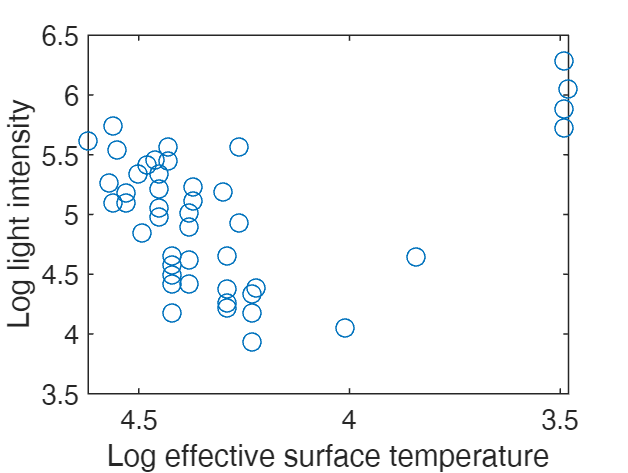

In [2]:
plot(X,y,'o');
xlabel('Log effective surface temperature')
ylabel('Log light intensity')
set(gca,'XDir','reverse');


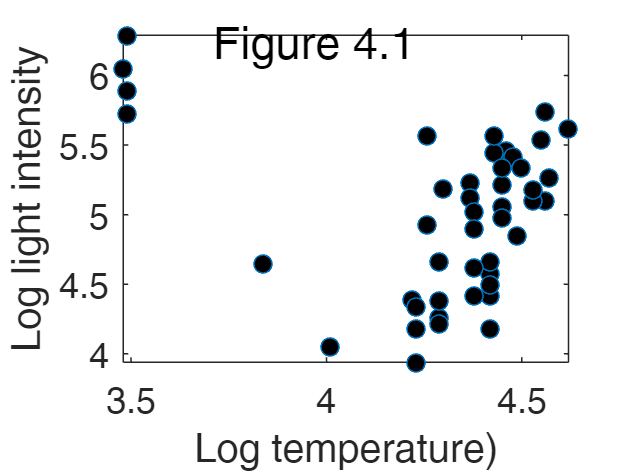

In [3]:

plot(X,y,'o','MarkerFaceColor','black')
set(gca,'FontSize',12)

xlabel('Log temperature)')
ylabel('Log light intensity')
sgtitle('Figure 4.1')
set(gcf,"Name",'Figure 4.1')

## Create Figure 4.2

Automatic outlier detection process


In [4]:
[out]=FSR(y,X,'plots',1);

-------------------------
Signal detection loop
Signal in final part of the search: step 43 because
rmin(43,47)>99% at final step: Bonferroni signal in the final part of the search.
rmin(43,47)>99.999%
------------------------------------------------
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=42
Superimposition stopped because r_{min}(43,44)>99% envelope
 !!!EQ_1!!! \% envelope
----------------------------
Final output
Number of units declared as outliers=4
Summary of the exceedances
           1          99         999        9999       99999
           0           2           2           1           1


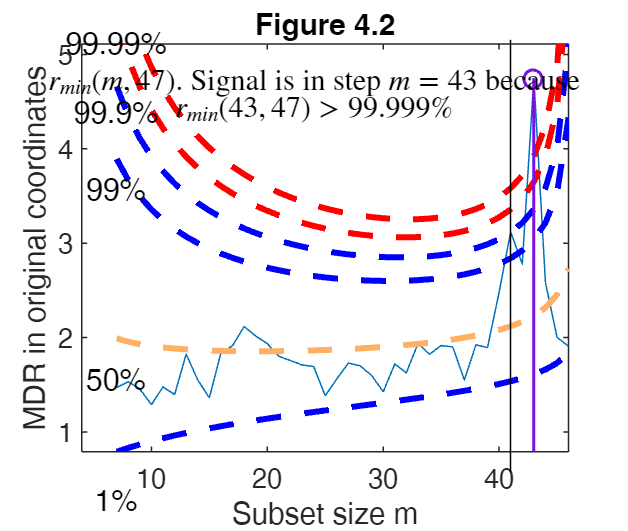

In [5]:
pl_yX=findobj(0, 'type', 'figure','tag','fsr_yXplot');
close(pl_yX(end))

pl_fsr=findobj(0, 'type', 'figure','tag','pl_fsr');
figure(pl_fsr(end))
xlabel('Subset size m')
ylabel("MDR in original coordinates")

title('Figure 4.2')
set(gcf,"Name",'Figure 4.2')

In [6]:

if prin==1
    % print to postscript
    print -depsc figs\STdetails.eps;
end

## Create Figure 4.3


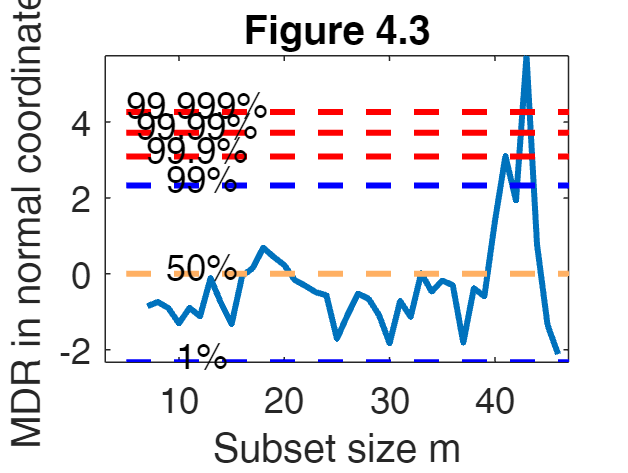

In [7]:
quan=[0.01 0.5 0.99 0.999 0.9999 0.99999];
plots=struct;
plots.conflev=quan;
plots.LineWidth=2;
plots.LineWidthEnv=2;
MDRinv=FSRinvmdr(out.mdr,size(X,2)+1,'plots',plots);
xlim([3 length(y)])

if prin==1
    % print to postscript
    print -depsc figs\STdetailsNC.eps;
end
title('Figure 4.3')
set(gcf,"Name",'Figure 4.3')

## Create Figure 4.4

Resuperimposing envelopes using mdr coordinates and normal coordinates at particular steps



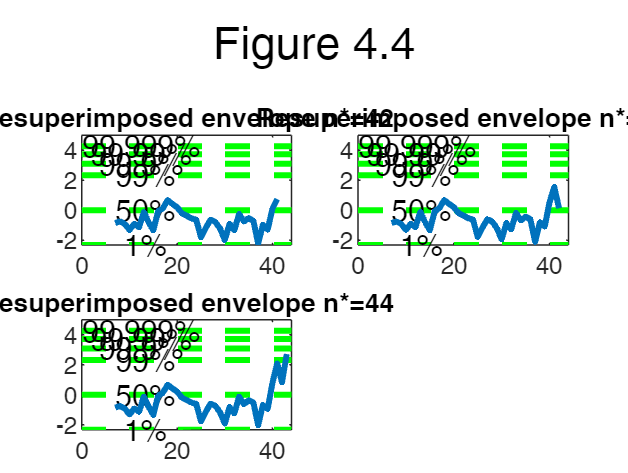

In [8]:
n0=[42 43 44];
ninv=norminv(quan);
lwdenv=2;
supn0=max(n0);

figure;
ij=0;
for jn0=n0
    ij=ij+1;
    [MDRinv] = FSRinvmdr(out.mdr,2,'n',jn0);
    % Plot for each step of the fwd search the values of mdr translated in
    % Plot for each step of the fwd search the values of mdr translated in
    % terms of normal quantiles
    subplot(2,2,ij)
    plot(MDRinv(:,1),norminv(MDRinv(:,2)),'LineWidth',2)
    xlim([0 supn0])
    v=axis;
    line(v(1:2)',[ninv;ninv],'color','g','LineWidth',lwdenv,'LineStyle','--','Tag','env');
    text(v(1)*ones(length(quan),1),ninv',strcat(num2str(100*quan'),'%'));
    line(MDRinv(:,1),norminv(MDRinv(:,2)),'LineWidth',2)
    title(['Resuperimposed envelope n*=' num2str(jn0)]);
end

if prin==1
    % print to postscript
    print -depsc STresuperNC.eps;
end
sgtitle('Figure 4.4')
set(gcf,"Name",'Figure 4.4')

## Create Figure 4.9

Compare different fits


In [9]:
figure
lwd=2;

plot(X,y,'o','MarkerFaceColor','black')
set(gca,'FontSize',12)

xlabel('Log(effective surface temperature)')
ylabel('Log(light intensity)')

% FS line
[out]=FSR(y,X,'plots',0);

-------------------------
Signal detection loop
Signal in final part of the search: step 43 because
rmin(43,47)>99% at final step: Bonferroni signal in the final part of the search.
rmin(43,47)>99.999%
------------------------------------------------
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=42
Superimposition stopped because r_{min}(43,44)>99% envelope
 !!!EQ_1!!! \% envelope
----------------------------
Final output
Number of units declared as outliers=4
Summary of the exceedances
           1          99         999        9999       99999
           0           2           2           1           1

In [10]:

x1=min(X);
x2=max(X);
y1=out.beta(1)+out.beta(2)*x1;
y2=out.beta(1)+out.beta(2)*x2;
line([x1;x2],[y1;y2],'LineStyle','--','LineWidth',lwd,'Color','m')

% S estimator with bdp=0.5
rhofunc='bisquare';
[outS]=Sreg(y,X,'rhofunc',rhofunc,'bdp',0.5,'conflev',1-0.01/n);

Total estimated time to complete S estimate:  0.23 seconds

In [11]:

x1=min(X);
x2=max(X);
y1=outS.beta(1)+outS.beta(2)*x1;
y2=outS.beta(1)+outS.beta(2)*x2;
line([x1;x2],[y1;y2],'LineStyle','--','LineWidth',lwd)

% MM085 = MM estimator with efficiency set to 0.85
[outMM]=MMregcore(y,X,outS.beta,outS.scale,'eff',0.85,'rhofunc',rhofunc);
x1=min(X);
x2=max(X);
y1=outMM.beta(1)+outMM.beta(2)*x1;
y2=outMM.beta(1)+outMM.beta(2)*x2;
line([x1;x2],[y1;y2],'LineStyle','-.','Color','green','LineWidth',lwd)

% MM095 = MM estimator with efficiency set to 0.95
[outMM]=MMregcore(y,X,outS.beta,outS.scale,'eff',0.95,'rhofunc',rhofunc);
x1=min(X);
x2=max(X);
y1=outMM.beta(1)+outMM.beta(2)*x1;
y2=outMM.beta(1)+outMM.beta(2)*x2;
line([x1;x2],[y1;y2],'LineStyle','-.','Color','red','LineWidth',lwd)

%  LTS with bdp=0.5
[outLXS]=LXS(y,X,'lms',0);

Total estimated time to complete LTS:  0.00 seconds


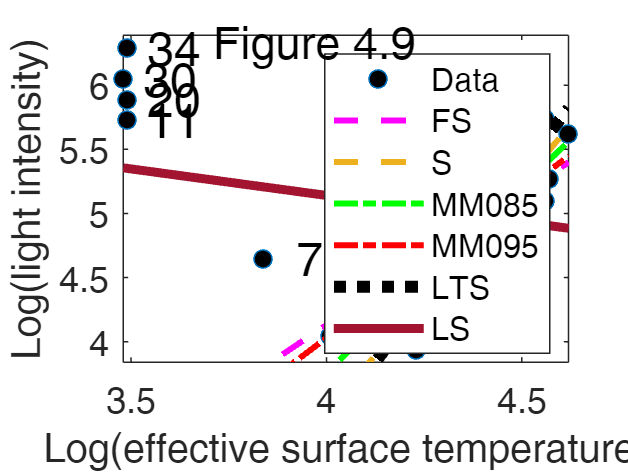

In [12]:
y1=outLXS.beta(1)+outLXS.beta(2)*x1;
y2=outLXS.beta(1)+outLXS.beta(2)*x2;
line([x1;x2],[y1;y2],'LineStyle',':','Color','black','LineWidth',lwd+2)

% LS: traditional regression
whichstats = {'beta','yhat','r','rsquare'};
stats = regstats(y, X,'linear',whichstats);
y1=stats.beta(1)+stats.beta(2)*x1;
y2=stats.beta(1)+stats.beta(2)*x2;
line([x1;x2],[y1;y2],'LineStyle','-','LineWidth',3)
xlim([x1 x2])

ylim([min(y)-0.1 max(y)+0.1])
legend('Data','FS','S','MM085','MM095','LTS','LS')
sel=[ 7 9 11 20 30 34]';
text(X(sel)+0.05,y(sel),num2str(sel),'FontSize',16)

sgtitle('Figure 4.9')
set(gcf,"Name",'Figure 4.9')

In [13]:

if prin==1
    % print to postscript
    print -depsc starsdatawithrobfit.eps;
end

## Create Figure 4.10

Monitoring S residuals



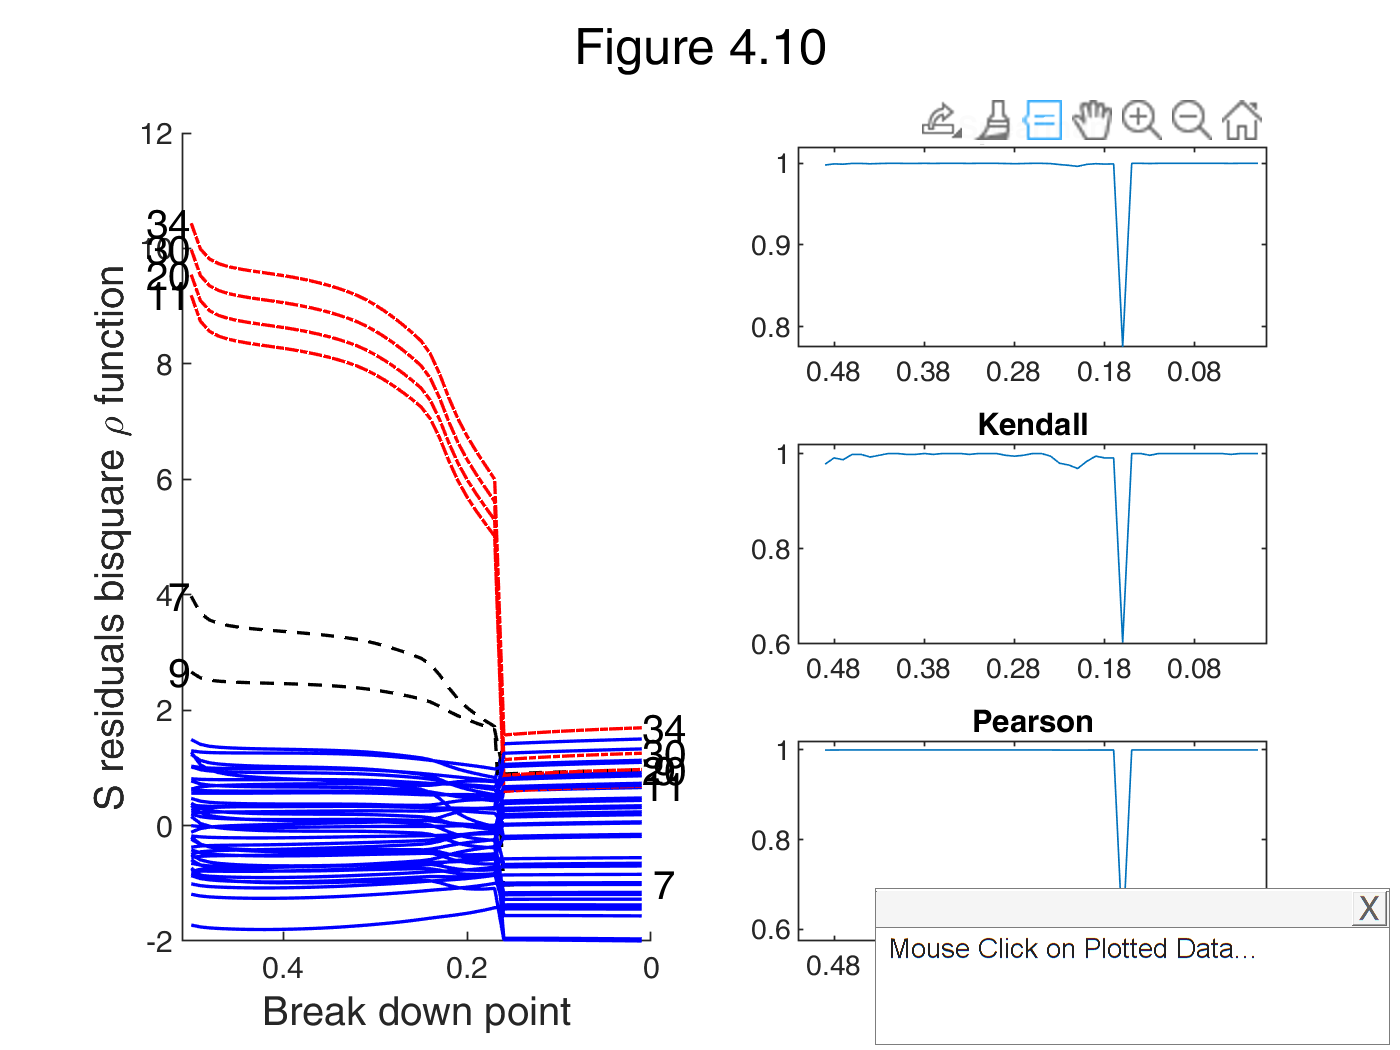

In [14]:
[outS]=Sregeda(y,X,'msg',0);
sel=[11 20 30 34  7 9]';
fground.LineStyle={'-.','-.','-.','-.','--','--'};
fground.Color={'r';'r';'r';'r';'k';'k'};
fground.flabstep=[0.01 0.5];
fground.funit=sel;
fground.FontSize=12;
standard=struct;
standard.laby='S residuals bisquare \rho function';
resfwdplot(outS,'standard',standard,'fground',fground, ...
    'corres',true,'tag','Sres');

if prin==1
    % print to postscript
    print -depsc figs\Sres.eps;
end
sgtitle('Figure 4.10')
set(gcf,"Name",'Figure 4.10')

## Create Figure 4.11

Monitoring MM residuals


In [15]:
[outMM]=MMregeda(y,X);

Total estimated time to complete S estimate:  0.01 seconds 
------------------------------


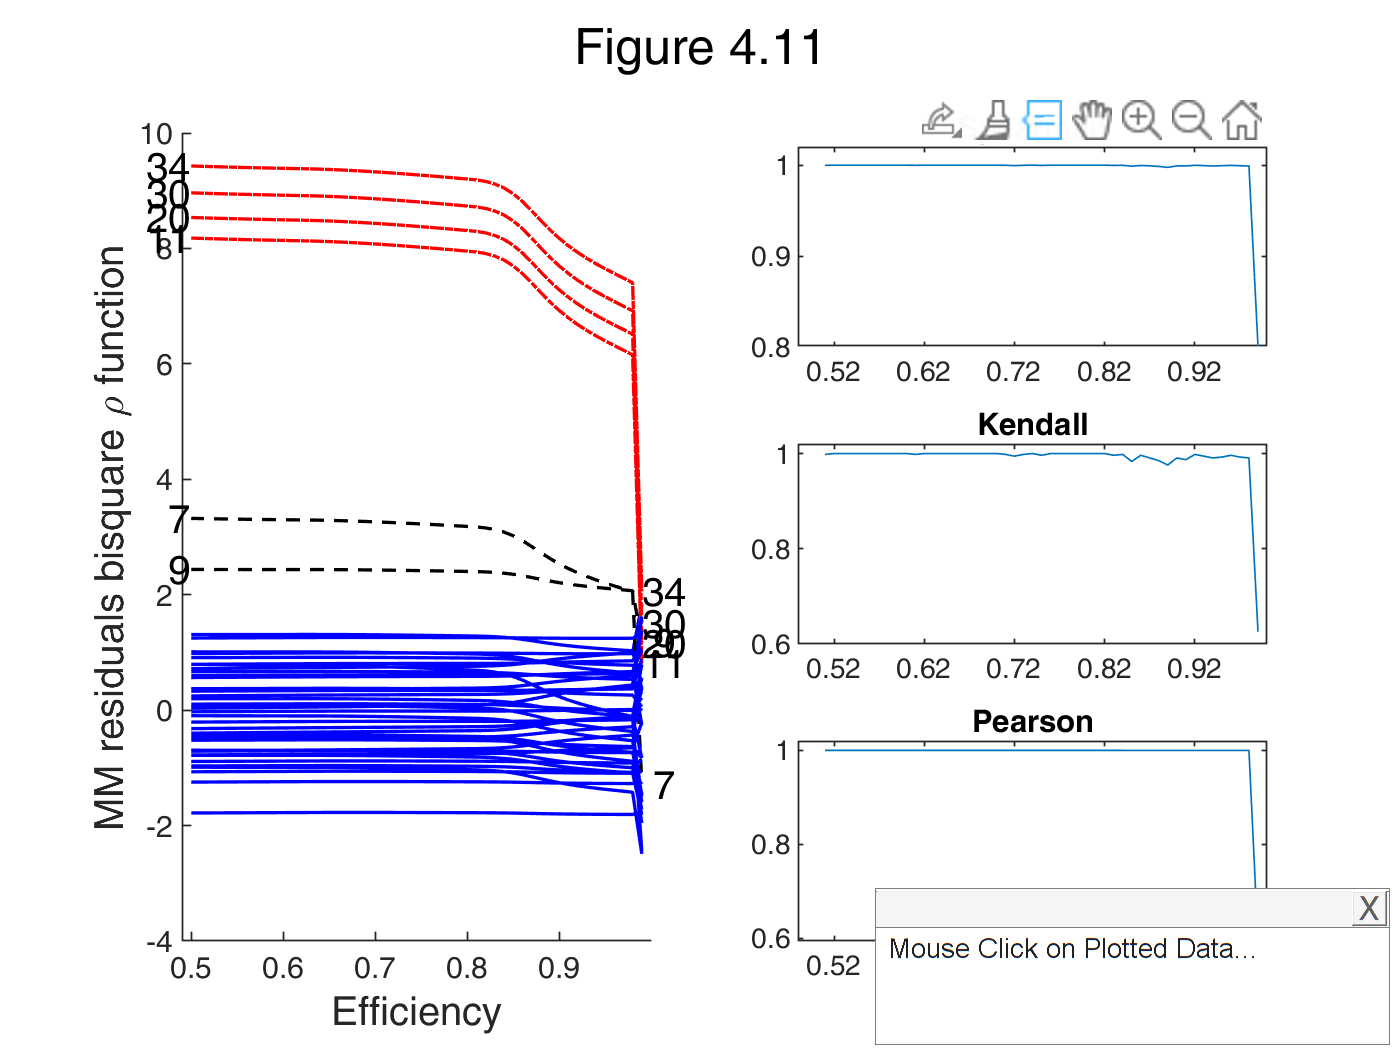

In [16]:

fground=struct;
sel=[11 20 30 34  7 9]';
fground.LineStyle={'-.','-.','-.','-.','--','--'};
fground.Color={'r';'r';'r';'r';'k';'k'};
fground.flabstep=[0.5 0.99];
fground.funit=sel;
fground.FontSize=12;
standard.laby='MM residuals bisquare \rho function';
resfwdplot(outMM,'standard',standard,'fground',fground, ...
    'corres',true,'tag','MMres');

prin=0;
if prin==1
    % print to postscript
    print -depsc figs\MMres.eps;
end

sgtitle('Figure 4.11')
set(gcf,"Name",'Figure 4.11')